## DownLoad Data Set

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')


In [3]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset


 83% 100M/121M [00:00<00:00, 161MB/s] 
100% 121M/121M [00:00<00:00, 179MB/s]


In [4]:
! unzip "face-expression-recognition-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [5]:
# Remove Extra Folder
!rm -r /content/images/images

Install Requirements

In [6]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [7]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

#### Data

##### Produce DataFrame

In [8]:
TRAIN_DIR = '/content/images/train'
TEST_DIR = '/content/images/validation'

# Since Data Is organzied in Folder we produce here the csv file for the databased on folders strcuture
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels


train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
# print(train)
train.to_csv('train.csv',index=True)

test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
test.to_csv('test.csv',index=True)



surprise completed
sad completed
neutral completed
happy completed
fear completed
angry completed
disgust completed
surprise completed
sad completed
neutral completed
happy completed
fear completed
angry completed
disgust completed


#### Extract Features

In [14]:
from tqdm.notebook import tqdm

def extract_features(images):
    '''
    Stack images together as Grey Scale
    '''
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [15]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])


# Normalization
x_train = train_features / 255.0 # [0-1]
x_test = test_features / 255.0 # [0-1]

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7066 [00:00<?, ?it/s]

In [16]:
# Enocde Labels to Categorial

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])

# Transform categorical labels to numerical labels
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

# Convert numerical labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)


### Model

In [9]:
# sequential model
model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# flattening
model.add(Flatten())

# fully connected layers  [Classiifcation]
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer with 7 output features [With SoftMax as activation]
model.add(Dense(7, activation='softmax'))

# model compilation
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

#### Model Training

In [ ]:
BATCH_SIZE=128
EPOCHS=100
model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 21s 57ms/step - loss: 1.8246 - accuracy: 0.2444 - val_loss: 1.8126 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 11s 49ms/step - loss: 1.7949 - accuracy: 0.2518 - val_loss: 1.7262 - val_accuracy: 0.2918
Epoch 3/100
226/226 [==============================] - 11s 50ms/step - loss: 1.7086 - accuracy: 0.3022 - val_loss: 1.5978 - val_accuracy: 0.3583
Epoch 4/100
226/226 [==============================] - 11s 49ms/step - loss: 1.5908 - accuracy: 0.3741 - val_loss: 1.4362 - val_accuracy: 0.4549
Epoch 5/100
226/226 [==============================] - 11s 49ms/step - loss: 1.4955 - accuracy: 0.4192 - val_loss: 1.3632 - val_accuracy: 0.4768
Epoch 6/100
226/226 [==============================] - 11s 49ms/step - loss: 1.4444 - accuracy: 0.4418 - val_loss: 1.3300 - val_accuracy: 0.4911
Epoch 7/100
226/226 [==============================] - 11s 50ms/step - loss: 1.4014 - accuracy: 0.4633 - val_loss: 1.2713 - val_ac

#### Save Model

In [ ]:
model_json = model.to_json()
with open("/content//emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("/content/emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Load Model

In [13]:
from keras.models import model_from_json
json_file = open("/content/emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("/content/emotiondetector.h5")

#### Model Evaluation

In [23]:
predictions =model.predict(x_test)
y_pred = [np.argmax(probas) for probas in predictions]
y_pred=to_categorical(y_pred, num_classes=7)


221/221 [==============================] - 1s 4ms/step


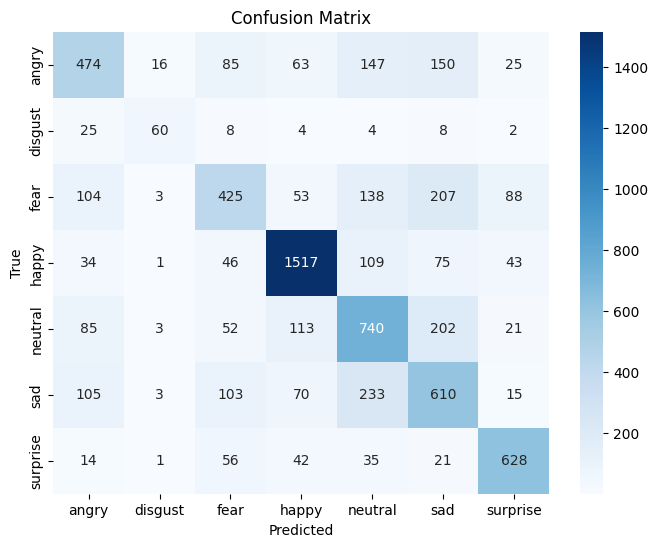

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Inference

In [31]:
# Imports
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [32]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [33]:

image = '/content/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad


/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 1s 638ms/step
model prediction is  sad


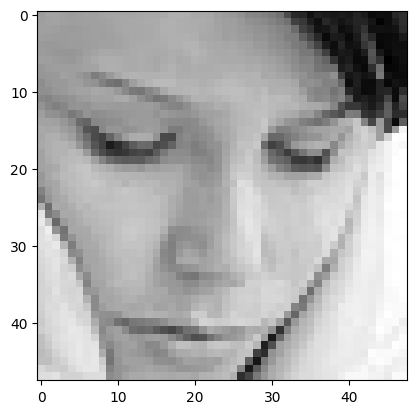

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img.reshape(48, 48), cmap='gray')